# Functional RMI - Power 2011 - TS Analysis

In [1]:
path = ".."

import os
import sys
sys.path.insert(0, path)

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
from problem import get_train_data, get_test_data

data_train_, labels_train_ = get_train_data(path=path)
data_test_, labels_test_ = get_test_data(path=path)

In [3]:
fmri_cols = [c for c in data_train_.columns if "fmri" in c]
fmri_cols

['fmri_basc064',
 'fmri_basc122',
 'fmri_basc197',
 'fmri_craddock_scorr_mean',
 'fmri_harvard_oxford_cort_prob_2mm',
 'fmri_motions',
 'fmri_msdl',
 'fmri_power_2011',
 'fmri_select']

In [4]:
accepted_fmri = data_train_['fmri_select'] > 0

### Atlas Power 2011

In [9]:
from nilearn import datasets
from nilearn.signal import clean
atlas = datasets.fetch_coords_power_2011()

In [10]:
idx = data_train_.index[1]

path_motions = os.path.join(path, data_train_.loc[idx, 'fmri_motions'])
confounds = np.loadtxt(path_motions)
path_fmri_power = os.path.join(path, data_train_.loc[idx, 'fmri_power_2011'])
timeseries = pd.read_csv(path_fmri_power, header=None).values
cleaned_timeseries = clean(timeseries, confounds=confounds)

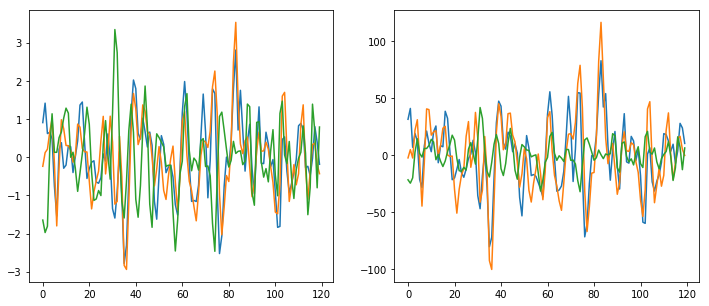

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(cleaned_timeseries[:, :3])
plt.subplot(122)
plt.plot(timeseries[:, :3])

In [117]:
cleaned_timeseries.shape

(180, 264)

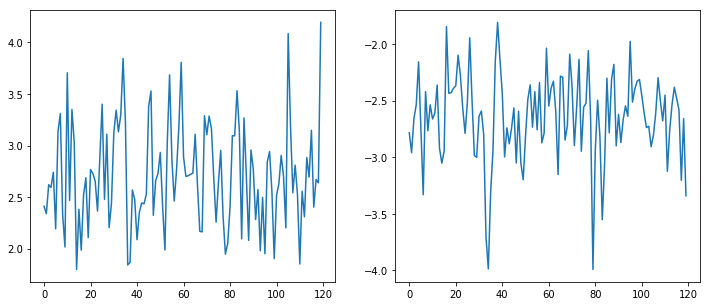

In [42]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(np.max(cleaned_timeseries[:, :], axis=1))
plt.subplot(122)
plt.plot(np.min(cleaned_timeseries[:, :], axis=1))

In [26]:
from tsfresh import extract_features, extract_relevant_features, select_features
# from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [27]:
extraction_settings = ComprehensiveFCParameters()

In [32]:
cleaned_timeseries.shape

(120, 264)

In [38]:
cleaned_timeseries_df = pd.DataFrame(cleaned_timeseries, columns=["{}".format(i) for i in range(264)])
cleaned_timeseries_df.loc[:, 'id'] = cleaned_timeseries_df.index

In [39]:
cleaned_timeseries_df.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,id
0,0.906475,-0.238150,-1.646452,-0.580201,-0.099001,1.312047,-0.146995,0.183421,0.718397,-0.409987,...,1.987645,-0.507472,2.071191,1.230700,0.422239,0.191174,-0.195573,-0.924565,-0.046803,0
1,1.416052,0.119417,-1.972729,-0.588476,-0.316413,1.148641,-0.103558,0.115470,0.774749,-0.226031,...,1.901195,-0.401839,1.884475,1.098422,0.023645,-0.185298,-0.344591,-1.048646,-0.293565,1
2,0.619916,0.210270,-1.808023,-0.468156,-0.559093,1.794327,0.564388,0.864979,1.925254,-1.304707,...,1.207819,1.001974,1.600879,0.281764,-0.147998,0.748525,-0.360078,-0.774221,0.503743,2
3,0.650777,0.665989,0.223641,-0.163156,-0.368618,0.763795,0.596512,1.030824,0.861614,-0.124635,...,-0.228138,0.444762,0.375186,-0.163497,0.120514,0.214116,0.799300,-0.190879,-0.190214,3
4,0.481581,1.005075,1.138077,-0.871149,-0.590159,0.579392,0.883295,1.793396,-0.228804,1.430353,...,-0.682613,-0.272078,-0.730558,-0.920701,0.336318,-0.071176,0.574808,-0.314899,-2.084891,4


In [40]:
%time X = extract_features(cleaned_timeseries_df, column_id='id', default_fc_parameters=extraction_settings);

Feature Extraction: 100%|██████████| 30/30 [03:32<00:00,  7.09s/it]


CPU times: user 58.6 s, sys: 4.33 s, total: 1min 2s
Wall time: 4min 21s


In [41]:
X

variable,0__abs_energy,0__absolute_sum_of_changes,"0__agg_autocorrelation__f_agg_""mean""","0__agg_autocorrelation__f_agg_""median""","0__agg_autocorrelation__f_agg_""var""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","0__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","0__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,9__time_reversal_asymmetry_statistic__lag_1,9__time_reversal_asymmetry_statistic__lag_2,9__time_reversal_asymmetry_statistic__lag_3,9__value_count__value_-inf,9__value_count__value_0,9__value_count__value_1,9__value_count__value_inf,9__value_count__value_nan,9__variance,9__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,0.821696,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.005204,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.384296,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.423511,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.231920,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.579800,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.364756,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.043333,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.144377,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
